In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import pickle as pkl
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [43]:
insd=pd.read_csv("insurance.csv")

In [44]:
insd.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
insd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
insd.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
insd.shape

(1338, 7)

In [48]:
insd.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
sns.set()

In [52]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

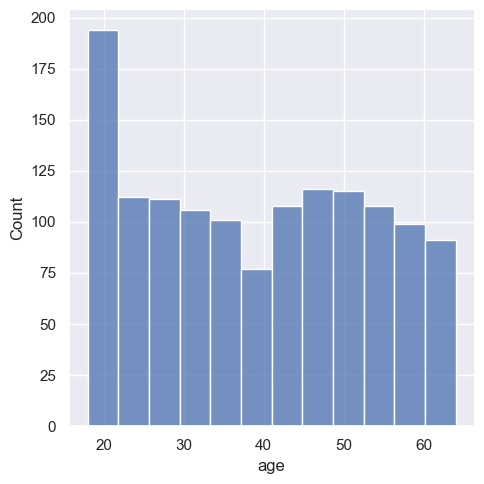

In [62]:
sns.displot(insd['age'])

In [77]:
insd['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [75]:
plt.show()

In [79]:
insd.replace({'sex':{'female':0,'male':1}},inplace=True)
insd.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
insd.replace({'smoker':{'no':0,'yes':1}},inplace=True)

# Data Spliting

In [81]:
inp=insd.drop(columns='charges')
opt=insd['charges']

In [84]:
inp.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [85]:
opt.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# 80% Train Data, 20% Test Data

In [169]:
inp_train_data, inp_test_data, opt_train_data, opt_test_data=train_test_split(inp, opt, test_size=0.2)

In [170]:
print(inp.shape)
print(opt.shape)
print(inp_train_data.shape)
print(inp_test_data.shape)
print(opt_train_data.shape)
print(opt_test_data.shape)

(1338, 6)
(1338,)
(1070, 6)
(268, 6)
(1070,)
(268,)


# Model Creation

In [171]:
model=RandomForestRegressor(n_estimators=100, max_depth=7)

#### Training Model

In [172]:
model.fit(inp_train_data, opt_train_data)

RandomForestRegressor(max_depth=7)

#### Predicting values with test dataset

In [173]:
test_data_predictions=model.predict(inp_test_data)

# Evaluating Model

In [174]:
r2_score(test_data_predictions, opt_test_data)

0.8424596040202615

In [179]:
ind=(23,1,35,2,1,0)

In [181]:
inda=np.asarray(ind)

In [182]:
print(inda)

[23  1 35  2  1  0]


In [183]:
inda=inda.reshape(1,-1)

In [184]:
print(inda)

[[23  1 35  2  1  0]]


In [186]:
insurance_premium=model.predict(inda)

C:\Users\vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [193]:
insurance_premium[0]

36549.69296940632

# Saving The Model

In [205]:
pkl.dump(model,open('IPML.pkl','wb'))

In [201]:
model=pkl.load(open('Insurance Premium','rb'))

In [203]:
st.header('Insurance Premium Predictor')

2024-11-14 03:13:04.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 03:13:04.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()